# ECE C247 - Neural Networks & Deep Learning, EEG Project


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
cd '/content/drive/My Drive/247/247_project'

/content/drive/My Drive/247/247_project


In [50]:
import datetime

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt



In [51]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parameters

In [65]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100




# Data Setup

## Load Data

In [53]:
data_path = "/content/drive/My Drive/247/247_project/project/"

# load data files subjects=[1,2,3,4,5,6,7,8,9]
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1,2,3,4,5,6,7,8,9], verbose=True)

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)


In [54]:
#pip install --upgrade scipy


## Preprocessing

In [55]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)
print(X_train_valid.shape) #(2115, 22, 1000)
print(X_test.shape) #(443, 22, 1000)

(2115, 22, 1000)
(443, 22, 1000)


## PyTorch Dataloaders

In [56]:
num_time = 1000

In [57]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid[:,:,:num_time], y_train_valid, X_test[:,:,:num_time], y_test, batch_size=BATCH_SIZE)

# Model Comparison

## CNN

In [58]:
## please refer to cnn.py and res.py python files




## Resnet+GRU

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 123MB/s]


Epoch 1/100, Train Loss: 1.414010115389554, Train Acc: 0.2429078014184397, Val Loss: 1.374239444732666, Val Acc: 0.2789598108747045
Epoch 2/100, Train Loss: 1.3951230409010402, Train Acc: 0.25059101654846333, Val Loss: 1.3837347030639648, Val Acc: 0.26004728132387706
Epoch 3/100, Train Loss: 1.3939968280072481, Train Acc: 0.26595744680851063, Val Loss: 1.3754078149795532, Val Acc: 0.2647754137115839
Epoch 4/100, Train Loss: 1.394051895951325, Train Acc: 0.2624113475177305, Val Loss: 1.3771651983261108, Val Acc: 0.2647754137115839
Epoch 5/100, Train Loss: 1.3854741038016554, Train Acc: 0.26832151300236406, Val Loss: 1.3951151371002197, Val Acc: 0.2458628841607565
Epoch 6/100, Train Loss: 1.387589969724979, Train Acc: 0.2635933806146572, Val Loss: 1.4005919694900513, Val Acc: 0.2553191489361702
Epoch 7/100, Train Loss: 1.383396513057205, Train Acc: 0.2777777777777778, Val Loss: 1.4135935306549072, Val Acc: 0.2364066193853428
Epoch 8/100, Train Loss: 1.383713742472091, Train Acc: 0.286052

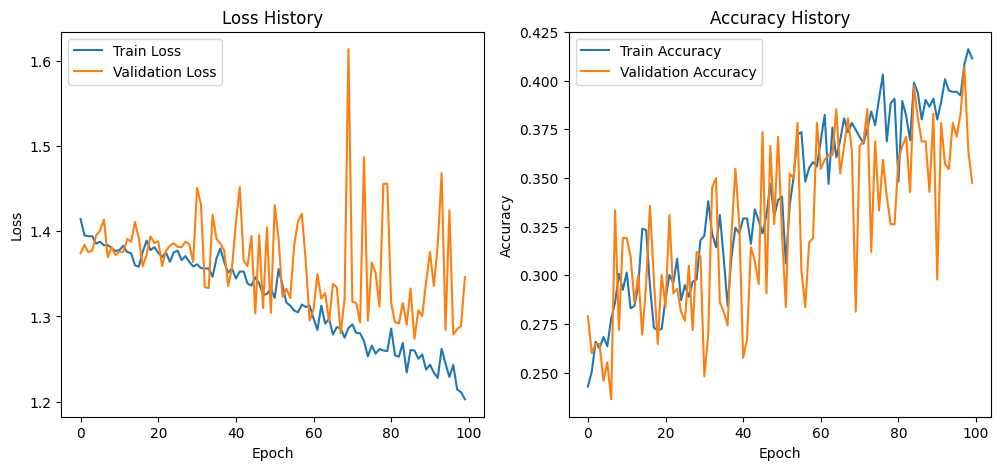

In [66]:
# need pretrained Resnet18, pleas refer to the models.py file
# for better results, try to increase the number of epochs
model = ResNetGRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

In [60]:
# #pip install torchsummary
# from torchsummary import summary


Epoch 1/100, Train Loss: 1.3882916805879124, Train Acc: 0.24054373522458627, Val Loss: 1.387715220451355, Val Acc: 0.26713947990543735
Epoch 2/100, Train Loss: 1.3865346503707598, Train Acc: 0.25, Val Loss: 1.386997103691101, Val Acc: 0.24822695035460993
Epoch 3/100, Train Loss: 1.3859764247570399, Train Acc: 0.2700945626477541, Val Loss: 1.3867216110229492, Val Acc: 0.22458628841607564
Epoch 4/100, Train Loss: 1.3851466111417086, Train Acc: 0.2730496453900709, Val Loss: 1.386687994003296, Val Acc: 0.23404255319148937
Epoch 5/100, Train Loss: 1.384470984620868, Train Acc: 0.28250591016548465, Val Loss: 1.3867580890655518, Val Acc: 0.2198581560283688
Epoch 6/100, Train Loss: 1.382840298256784, Train Acc: 0.28841607565011823, Val Loss: 1.3871644735336304, Val Acc: 0.23167848699763594
Epoch 7/100, Train Loss: 1.3821074197877128, Train Acc: 0.29609929078014185, Val Loss: 1.3872475624084473, Val Acc: 0.24349881796690306
Epoch 8/100, Train Loss: 1.3801867624498763, Train Acc: 0.2842789598108

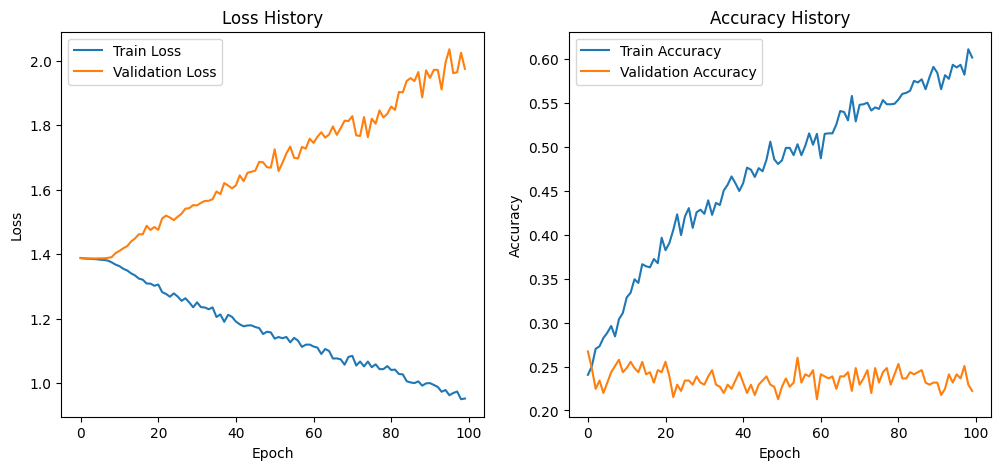

In [67]:
from models import *
input_size = X_train_valid.shape[2]  # Number of features per timestep

#model = LSTM().cuda()
model = Seq2SeqForClassification(input_size=22, hidden_size=32, num_layers=3, dropout=0.5, output_size=4).cuda()

# def print_model_summary(model):
#     print("Model's layers:")
#     for layer in model.modules():
#         print(layer)

# print_model_summary(model)

optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)